# Example: creating db, querying db, and plotting results

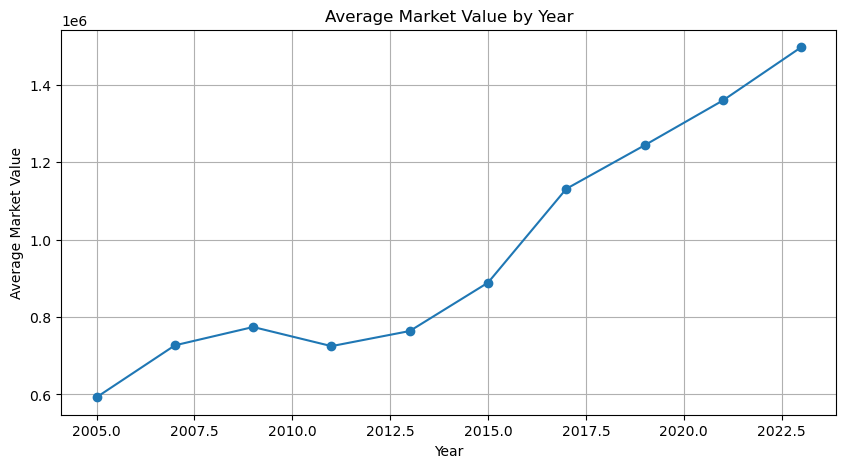

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from boston_housing_import import boston_housing_import

# creating the database

# keeps every other year from 2005 to 2023
years_to_keep = [year for year in range(2005, 2024, 2)]

# path to the SQLite database - will be created if it doesn't exist
file_loc = '/Users/ivan/Documents/examplepath/BostonHousing.db'

# if you want to keep all years, remove the years_to_keep argument
boston_housing_import(file_loc=file_loc, years_to_keep=years_to_keep)

# ---------------------------------------------------------------------
# querying the database, plotting the data

# Connect to the SQLite database
conn = sqlite3.connect("bostonhousing.db")

# Define the SQL query
query = """
SELECT year, AVG(market_value) AS average_market_value
FROM (
  SELECT year, (bv + lv) AS market_value
  FROM assessments
) AS subquery
GROUP BY year;
"""

# Execute the query and store the result in a Pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(df['year'], df['average_market_value'], marker='o')
plt.title('Average Market Value by Year')
plt.xlabel('Year')
plt.ylabel('Average Market Value')
plt.grid()
plt.show()
